In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
img=data.camera()
height=img.shape[0]
width=img.shape[1]

def paddingZero(_img,_size):
    h = _img.shape[0]+2*int((_size-1)/2)
    w = _img.shape[1]+2*int((_size-1)/2)
    n = np.zeros((h,w))
    start_0 = int((_size-1)/2)
    end_0 = int((_size-1)/2)+_img.shape[0]
    start_1 = int((_size-1)/2)
    end_1 = int((_size-1)/2)+_img.shape[1]
    n[start_0:end_0,start_1:end_1] = _img
    return n

In [6]:
def Roberts(_img):
    mx = np.array([
        [0,0,0],
        [0,-1,0],
        [0,0,1]
    ])
    my = np.array([
        [0,0,0],
        [0,0,-1],
        [0,1,0]
    ])
    t_size=3
    img_padded = paddingZero(_img,t_size)
    test = np.zeros_like(_img,dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            window = img_padded[i:i+t_size,j:j+t_size]
            _gx = np.sum(window*mx)
            _gy = np.sum(window*my)
            mag = int(np.sqrt(_gx**2+_gy**2))#取整开根号 欧几里得公式
            test[i,j]=mag
    return test

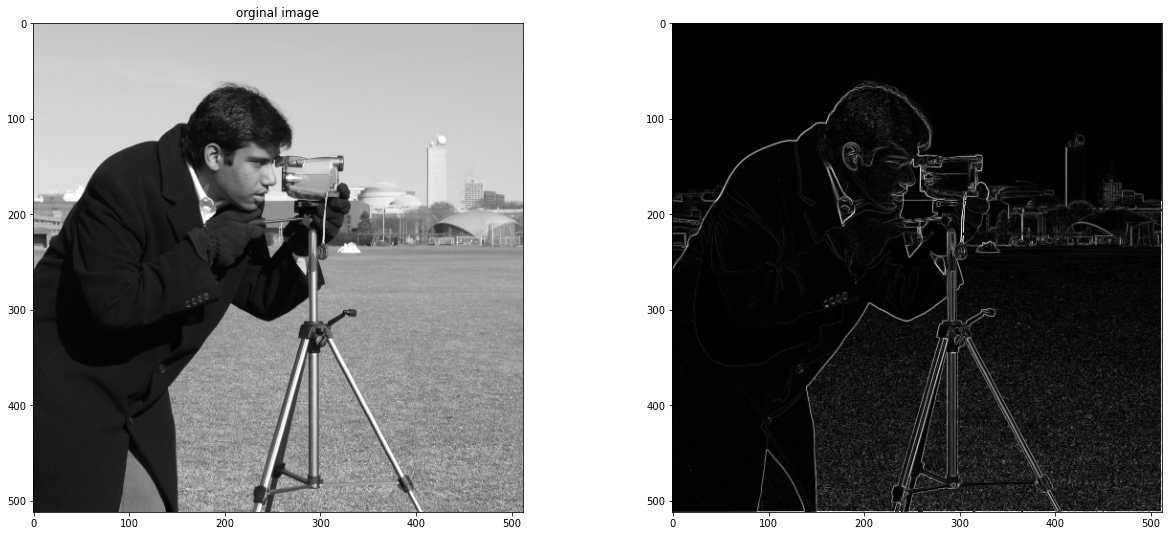

In [7]:
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,2,1)
org.imshow(img,cmap='gray')
org.set_title("orginal image")

test_img = fig.add_subplot(1,2,2)
test_img.imshow(Roberts(img),cmap='gray')
plt.show()